In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression

Supplementary Fig. 12c


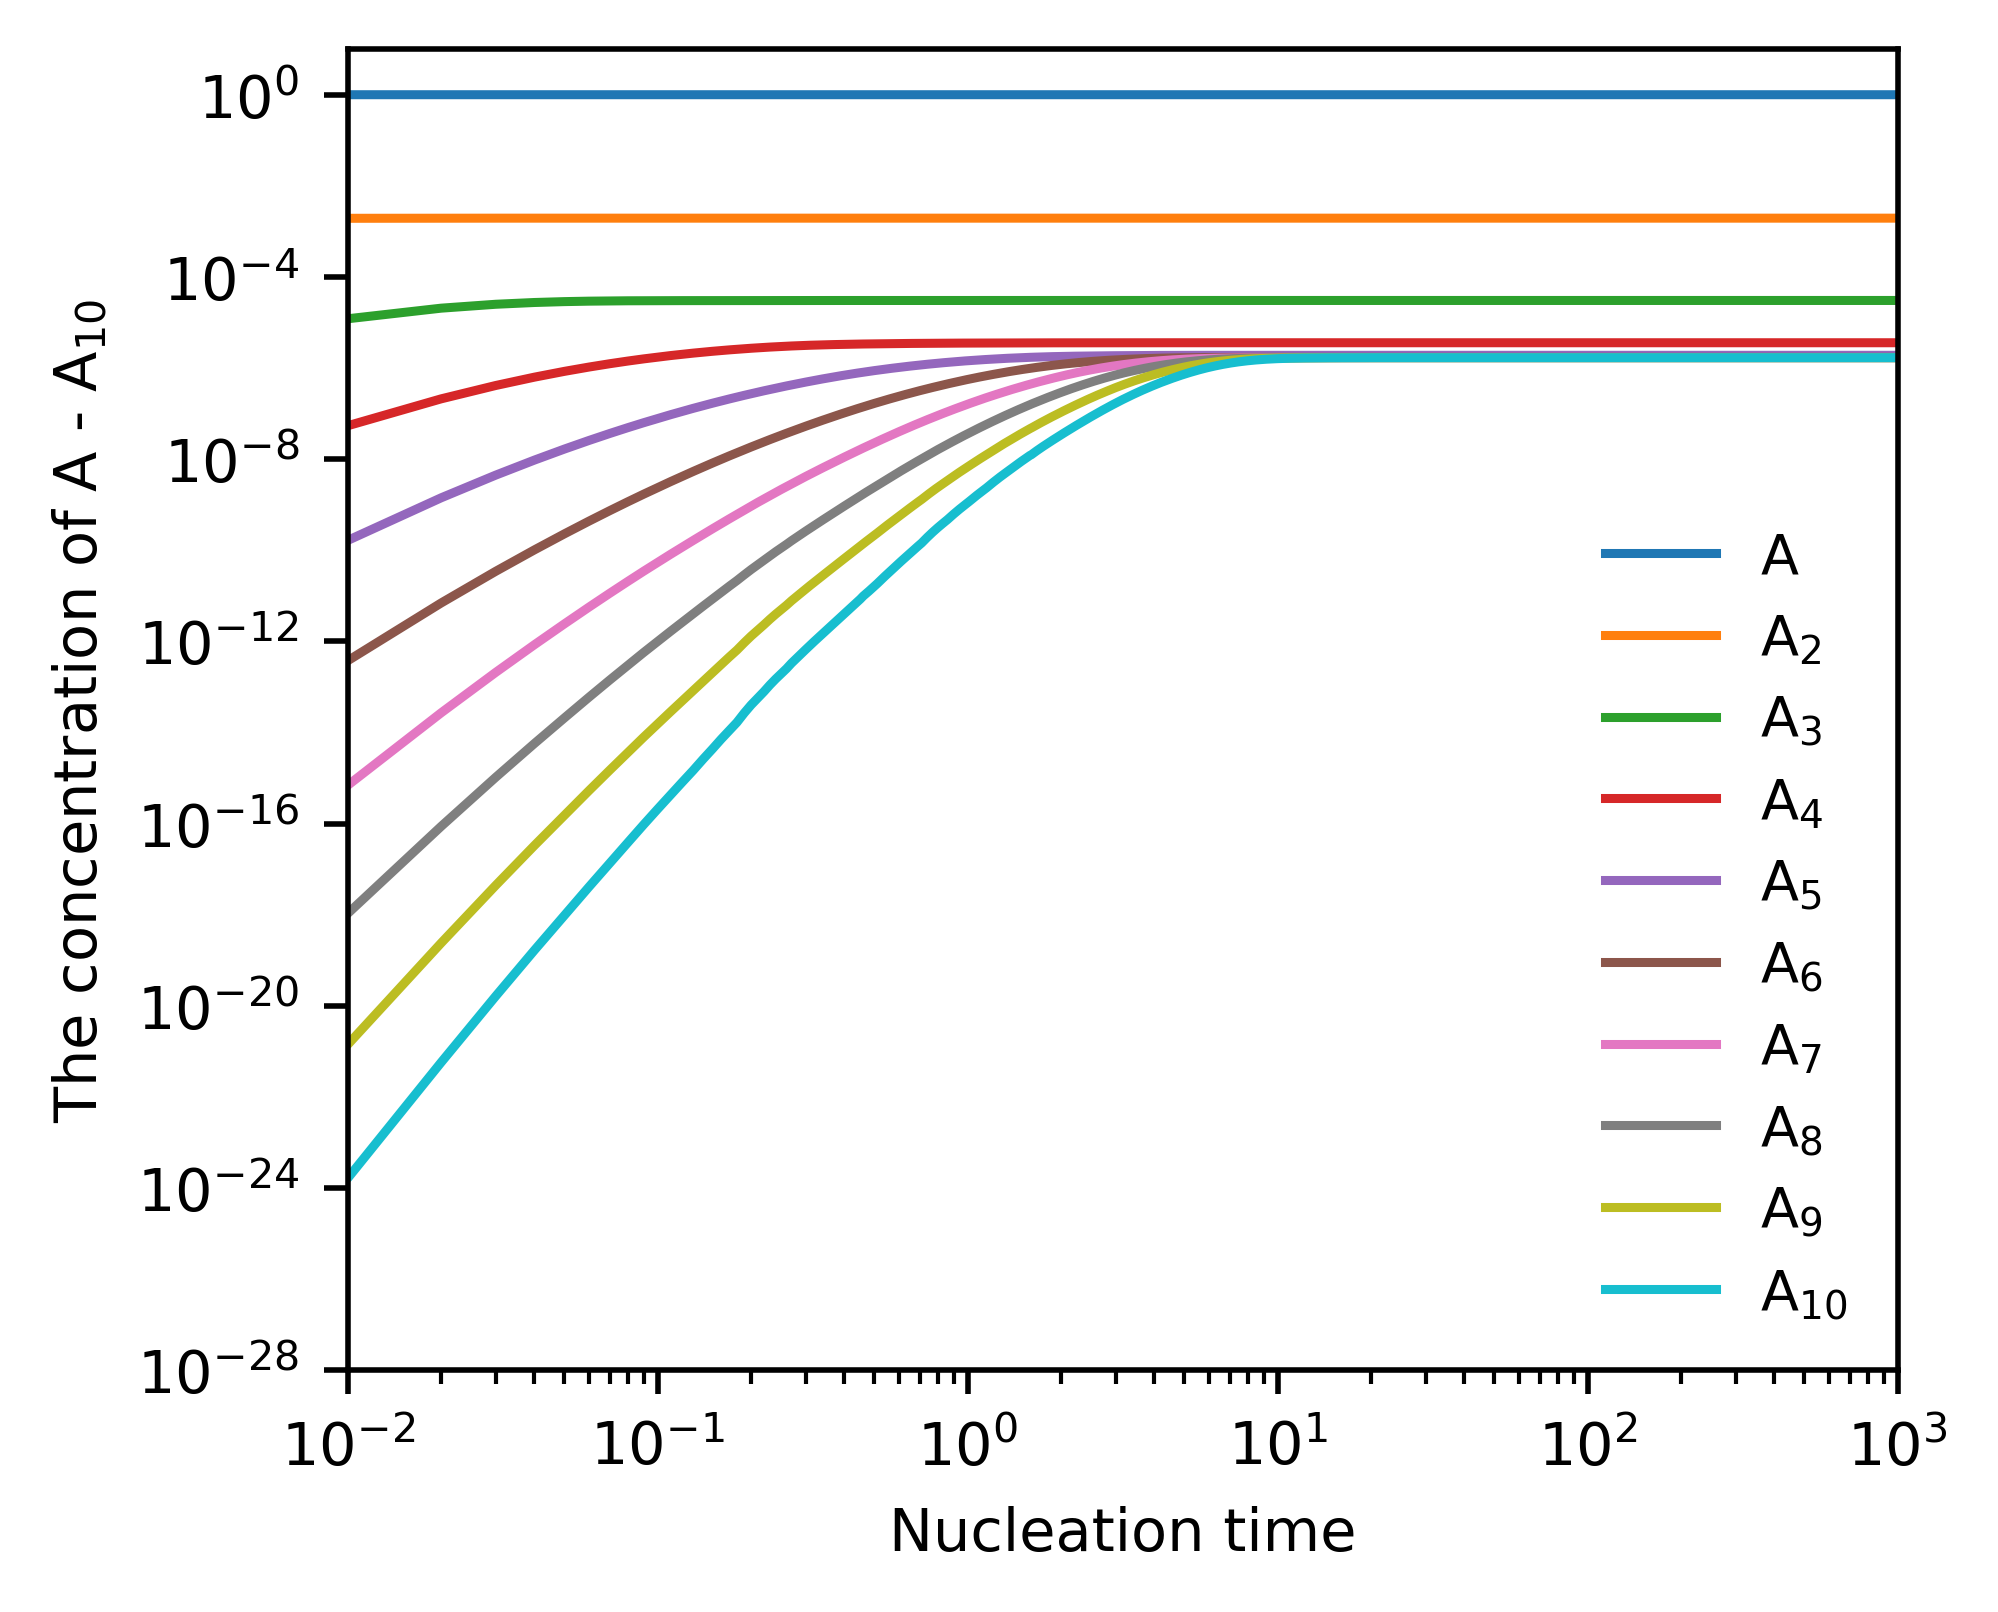

In [8]:
ki_forward=1        # ki_forward represents the forward rate at step i of attaching a motif
ki_backward=[0]     # ki_backward represents the backward rate at step i of detaching a motif
for a in range(1,9):         
    ki_backward.append(8**(4-a))    
ki_backward.append(0)
len_ki_backward=len(ki_backward)
# print("ki_backward=",ki_backward)
# print("length of ki_backward=",len_ki_backward)

kAiB_backward=[1E6]*len_ki_backward    
kAiB_backward[0]=0
len_kAiB_backward=len(kAiB_backward)

k_backward=ki_backward
k_backward.extend(kAiB_backward)
len_k_backward=len(k_backward)
# print("kAiB_backward=",kAiB_backward)
# print("length of kAiB_backward=",len_kAiB_backward)
# print("k_backward=",k_backward)
# print("length of k_backward=",len_k_backward)


print("Supplementary Fig. 12c")
plt.figure(figsize=(4,3.5),dpi=500)
t=0
list1=[]     # list1 is used to store the logarithm of the concentration c of crystallizable units in the system
list2=[]     # list2 is used to store the logarithm of the nucleation flux of the system represented by the formation flux of clusters A10, J'=[A9]*ki_forward*c
for c in np.arange(1,0.2,-0.1):    # c represents the concentration pA of crystallizable units in the system
    matrix=np.zeros((len_k_backward,len_k_backward))
    for i in range(len_k_backward):           
        for j in range(len_k_backward):
            if i in range(0,len_ki_backward) and j in range(0,len_ki_backward):
                if i==j:
                    matrix[i][j]=-k_backward[i]-1
                if i==j-1:
                    matrix[i][j]=k_backward[j]
                if i==j+1:
                    matrix[i][j]=c
                if i==0:
                    matrix[i][j]=0
                if i==len_ki_backward-2 and j==len_ki_backward-1: 
                    matrix[i][j]=0
                if i==len_ki_backward-1 and j==len_ki_backward-1:
                    matrix[i][j]=-c
            if i in range(0,len_ki_backward) and j in range(len_ki_backward,len_k_backward):
                if i==j-(len_ki_backward+1):
                    matrix[i][j]=k_backward[j]
                if i==0:
                    matrix[i][j]=0
            if i in range(len_ki_backward,len_k_backward) and j in range(0,len_ki_backward):
                if i==j+(len_ki_backward+1):
                    matrix[i][j]=(1-c)   
            if i in range(len_ki_backward,len_k_backward) and j in range(len_ki_backward,len_k_backward):
                if i==j:
                    matrix[i][j]=-k_backward[j]-k_backward[j-len_ki_backward-1]-c
                if i==len_ki_backward+1 and j==len_ki_backward+1:
                    matrix[i][j]=-k_backward[j]-c
                if i==j+1:
                    matrix[i][j]=c
                if i==j-1:
                    matrix[i][j]=k_backward[i-len_ki_backward]
                if i==len_ki_backward:
                    matrix[i][j]=0
                if j==len_ki_backward:
                    matrix[i][j]=0
    t=t+1
    
    init_y=np.zeros_like(k_backward)
    init_y[0]=c
    init_y[len_ki_backward]=1-c
    # print("init_y")
    # print(init_y)

    def diff_func(y, g):
        return matrix.dot(y)
    
    x = np.linspace(0, 1000, 100000)
    y = odeint(diff_func, init_y, x)

    list1.append(np.log(c))
    list2.append(np.log(y[-1,len_ki_backward-2]*ki_forward*c))     # y[-1,len_ki_backward-2]*c calculates the formation flux of clusters A10 at the steady state of nucleation

    if c==1:
        plt.plot(x,y[:,0],"-",label="A",linewidth=1.3)
        plt.plot(x,y[:,1],"-",label="A$_2$",linewidth=1.3)
        plt.plot(x,y[:,2],"-",label="A$_3$",linewidth=1.3)
        plt.plot(x,y[:,3],"-",label="A$_4$",linewidth=1.3)
        plt.plot(x,y[:,4],"-",label="A$_5$",linewidth=1.3)
        plt.plot(x,y[:,5],"-",label="A$_6$",linewidth=1.3)
        plt.plot(x,y[:,6],"-",label="A$_7$",linewidth=1.3)
        plt.plot(x,y[:,7],"-",label="A$_8$",linewidth=1.3)
        plt.plot(x,y[:,8],"-",label="A$_9$",linewidth=1.3)
        plt.plot(x,y[:,9],"-",label="A$_{10}$",linewidth=1.3)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nucleation time",fontsize=8.5)
plt.ylabel("The concentration of A - A$_{10}$",fontsize=8.5)
plt.tick_params(labelsize=8.5)
plt.legend(loc="lower right")
plt.rcParams.update({'font.size':8})
plt.legend(bbox_to_anchor=(1.05, 1))
plt.legend(frameon=False)
plt.xlim([1E-2,1E3])
plt.ylim([1E-28,1E1])
plt.rcParams["xtick.direction"]="out"
plt.rcParams["ytick.direction"]="out"
plt.show()